In [29]:
from config import api_key
from yelpapi import YelpAPI
import requests
import pandas as pd
import numpy as np
import random
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from matplotlib import colors
from pprint import pprint

In [30]:
cities = ["Anaheim,CA", "Santa Ana,CA", "Irvine,CA", "Cypress,CA", "Garden Grove,CA", "Orange,CA", "Fullerton,CA", "Costa Mesa,CA", "Tustin,CA","Westminster,CA"]
url = "https://api.yelp.com/v3/businesses/search"
headers = {'Authorization': 'Bearer %s' %api_key}
price_locations = {}

for city in cities:
    locations={}
    params = {"term":"restaurant",
              "location":city,
              "limit":50,
             "radius":5000}
    responses=requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        try:
            money= response["price"]
            if money not in locations:
                locations[money]=1
                
            else:
                locations[money]+=1
        except KeyError:
            continue  
    price_locations[city]=locations 
    url_params = {"term":"restaurant",
                  "location":city,
                  "limit":50,
                 "offset":50,
                  "radius":5000}
    results = requests.get(url,headers = headers, params = url_params).json()
    for r in results["businesses"]:
        try:
            m = r["price"]
            if m not in locations:
                locations[m]=1
            else:
                locations[m]+=1
        except KeyError:
            continue
    price_locations[city]=locations
print(price_locations)        
     

{'Anaheim,CA': {'$$': 62, '$$$': 8, '$': 26, '$$$$': 3}, 'Santa Ana,CA': {'$$': 46, '$$$$': 1, '$': 51}, 'Irvine,CA': {'$$': 65, '$$$': 2, '$': 33}, 'Cypress,CA': {'$': 48, '$$': 48, '$$$': 3}, 'Garden Grove,CA': {'$$': 46, '$': 50, '$$$$': 2, '$$$': 1}, 'Orange,CA': {'$$': 53, '$': 43, '$$$$': 2, '$$$': 1}, 'Fullerton,CA': {'$$': 59, '$': 36, '$$$': 2}, 'Costa Mesa,CA': {'$$': 67, '$': 28, '$$$': 3, '$$$$': 1}, 'Tustin,CA': {'$': 39, '$$': 58, '$$$': 3}, 'Westminster,CA': {'$': 55, '$$': 44}}


In [31]:
columns = ["Cheap","Affordable","Expensive","Luxury"]
DF=pd.DataFrame.from_dict(price_locations).T #.T means transpose, switch columns and rows
DF = DF.reset_index()
# df.rename(columns = {'index':'City','$':'Cheap'}, inplace = True)
df = DF.rename(columns={"$":"Cheap","$$":"Affordable","$$$":"Expensive","$$$$":"Luxury","index":"City"})
# DF.to_csv("output.csv")

df = df.fillna(0)
df

,City,Cheap,Affordable,Expensive,Luxury
0,"Anaheim,CA",26.0,62.0,8.0,3.0
1,"Costa Mesa,CA",28.0,67.0,3.0,1.0
2,"Cypress,CA",48.0,48.0,3.0,0.0
3,"Fullerton,CA",36.0,59.0,2.0,0.0
4,"Garden Grove,CA",50.0,46.0,1.0,2.0
5,"Irvine,CA",33.0,65.0,2.0,0.0
6,"Orange,CA",43.0,53.0,1.0,2.0
7,"Santa Ana,CA",51.0,46.0,0.0,1.0
8,"Tustin,CA",39.0,58.0,3.0,0.0
9,"Westminster,CA",55.0,44.0,0.0,0.0


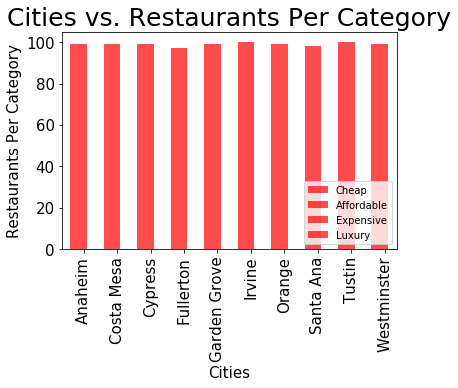

In [32]:
plt.figure(figsize=(15,7))
#df.plot.bar(stacked=True)

plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)

stars = ["Anaheim", "Costa Mesa", "Cypress", "Fullerton", "Garden Grove", "Irvine", "Orange", "Santa Ana", "Tustin", "Westminster"]

x_axis = np.arange(len(stars))
df.plot.bar(x_axis, color='r', alpha=0.7, align='edge', stacked=True)


tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, stars)

#plt.xlim(-0.25,len(x_axis))
#plt.ylim(0, 100)

plt.title('Cities vs. Restaurants Per Category')
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Restaurants Per Category', fontsize=15)
plt.legend()

plt.show()
